In [1]:
import numpy as np
import pandas as pd
from konlpy.tag import *
import matplotlib.pylab as plt
%matplotlib inline
from korean_crawling_bundles import *

In [2]:
train_df = pd.read_csv('0917_with_link.csv')
train_df.tail()

,Link,Doc
88,http://v.media.daum.net/v/20180917060006793,[데일리안 = 이정윤 기자]\n서울시 영등포구 한 아파트 단지 앞 상가에 공인중개사...
89,http://v.media.daum.net/v/20180917060006789,[데일리안 = 이정윤 기자]\n달동네와 쪽방촌 등 주거 취약지역에 위치한 노후주택을...
90,http://v.media.daum.net/v/20180917060004783,민관협력형 노후주택 개선사업 개요. /자료제공=국토교통부\n국토교통부와 대통령직속 ...
91,http://v.media.daum.net/v/20180917055603762,"추석 앞두고 활기 넘치는 광장시장./사진=뉴시스 @머니S MNB, 식품 외식 유통 ..."
92,http://v.media.daum.net/v/20180917054801642,[앵커] 남북 경제협력의 시작은 30년 전으로 거슬러 올라갑니다.\n하지만 남북 관...


In [3]:
kkma = Kkma()

train = train_df.iloc[:,1:].values
train_report = [train[i][0] for i in range(len(train))]
print(len(train_report))
train_report[0]

93


'미중 무역분쟁 더욱 격화, 中 아이폰 수출 중지할 수도\n뉴스1 | 박형기 기자 | 2018.09.17 08:04\n(서울=뉴스1) 박형기 기자 = 도널드 트럼프 미국 대통령이 미중 무역협상을 앞두고 2000억 달러의 중국제품에 추가 관세를 부과할 것이라고 밝히자 중국이 무역협상을 거부할 조짐을 보이는 등 미중간의 무역 갈등이 최고조로 치닫고 있다.\n중국은 미국에 핵심적인 부품 또는 제품의 수출을 금지하는 카드를 빼들 수 있어 무역분쟁의 수위는 더욱 높아질 전망이다.\n중국은 특히 애플 아이폰의 수출을 금지하는 조취를 취할 수 있다고 미국의 월스트리트저널(WSJ)은 16일(현지시간) 보도했다.\nWSJ 갈무리\nWSJ은 중국의 한 고위 관리를 인용, “중국은 미국이 추가로 관세를 부과하면 미국에 핵심적인 부품 또는 제품 수출을 금지하는 방안을 고려하고 있으며, 애플의 아이폰도 이에 포함될 수 있다”고 전했다.\n현재 애플은 아이폰 전량을 중국에서 조립하고 있다. 중국은 아이폰을 면세지역에서 생산케 해 어떠한 관세도 부과하지 않고 있다.\n뤄지웨이 전 재정부장은 미국의 관세부과에 맞서 일부 품목의 수출 금지 조치를 취할 것을 주장했다. 뤄 전 재정부장은 16일 베이징에서 미중 경제학자와 기업가가 모인 한 세미나에서 이같이 주장했다.\n당초 중국은 류허 부총리가 미국을 방분하기 전에 류쿤 현 재정부장을 파견, 협상의 분위기를 조성할 예정이었지만 미국이 2000억 달러의 중국 제품에 추가관세를 부과할 것이라고 협박하자 모든 일정을 취소할 조짐을 보이고 있다.\n한편 미국이 500억 달러의 중국제품에 관세를 부과한데 이어 2000억 달러에 추가 관세를 매기면 중국산 수입품 중 절반에 관세를 부과하는 것이 된다. 지난해 중국의 대미 수출규모는 5050억 달러였다.\nsinopark@news1.kr\n<저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>'

In [4]:
try:
    training_ls = [str(kkma.nouns(train_report[i])) for i in range(len(train_report))]
except : 
    excepted_ls.append(i)
    print('{}th data is excepted, maybe it has NaN value'.format(i))
    
display(Markdown('#### length of data : {}'.format(len(training_ls))))

#### length of data : 93

In [5]:
word_df = pd.DataFrame(data = training_ls,columns=np.arange(1))
# df.to_csv('0916_konlpy.csv')
word_df.tail()

,0
88,"['데일리', '데일리안', '안', '이정', '이정윤', '윤', '기자', '..."
89,"['데일리', '데일리안', '안', '이정', '이정윤', '윤', '기자', '..."
90,"['민', '민관협력', '관', '협력', '노후', '노후주택', '주택', '..."
91,"['추석', '활기', '광장', '광장시장', '시장', '사진', '뉴', '뉴..."
92,"['앵커', '남북', '경제', '경제협력', '협력', '시작', '30', '..."


In [6]:
for i in range(len(word_df)) : 
    word_df.iat[i,0] = word_df.iat[i,0][1:-1]
    
word_ls = []
for i in range(len(word_df)) : 
    new_ls = word_df.iat[i,0].split(',')

    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace(' ','')
    
    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace("'",'')
    
    word_ls += new_ls
len(word_ls)

25708

In [7]:
print(len(word_ls))
for _ in range(10):
    for idx,i in enumerate(word_ls) : 
        if len(i) < 3:
             word_ls.pop(idx)
    print(len(word_ls))

25708
15311
10451
8843
8550
8535
8535
8535
8535
8535
8535


In [8]:
from collections import Counter
cnt_dict = dict(Counter(word_ls))

df = pd.DataFrame(columns=['Count'])
df['Count'] = cnt_dict.values()
df.index = cnt_dict.keys()
df.sort_values('Count',ascending=False,inplace=True)

df

,Count
17일,39
2018.09,38
가능성,36
저작권자,33
지난해,29
연합뉴스,28
대통령,27
2000,27
가운데,26
관계자,25


,Count
count,3703.000000
mean,2.304888
std,2.770863
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,39.000000


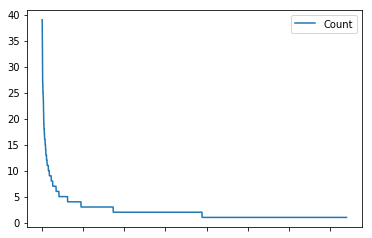

In [9]:
display(df.describe())
display(df.plot())

In [10]:
testing_ls = list(df[df['Count']>1].index)
len(testing_ls)

1945

In [11]:
count_dictionary = dict(zip(np.arange(len(train_df)),[0 for _ in range(len(train_df))]))
for idx,doc in enumerate(train_df['Doc']):
    for word in testing_ls : 
        if word in doc : 
            count_dictionary[idx] += 1
count_dictionary

{0: 46,
 1: 95,
 2: 85,
 3: 44,
 4: 64,
 5: 75,
 6: 116,
 7: 92,
 8: 89,
 9: 63,
 10: 72,
 11: 79,
 12: 28,
 13: 92,
 14: 190,
 15: 78,
 16: 32,
 17: 75,
 18: 88,
 19: 71,
 20: 55,
 21: 103,
 22: 81,
 23: 77,
 24: 335,
 25: 42,
 26: 46,
 27: 86,
 28: 55,
 29: 36,
 30: 142,
 31: 128,
 32: 65,
 33: 16,
 34: 61,
 35: 122,
 36: 62,
 37: 107,
 38: 85,
 39: 52,
 40: 43,
 41: 151,
 42: 47,
 43: 93,
 44: 347,
 45: 79,
 46: 147,
 47: 163,
 48: 91,
 49: 129,
 50: 94,
 51: 60,
 52: 50,
 53: 73,
 54: 40,
 55: 76,
 56: 43,
 57: 69,
 58: 30,
 59: 39,
 60: 26,
 61: 42,
 62: 39,
 63: 22,
 64: 80,
 65: 75,
 66: 67,
 67: 42,
 68: 74,
 69: 46,
 70: 33,
 71: 77,
 72: 45,
 73: 39,
 74: 91,
 75: 81,
 76: 41,
 77: 58,
 78: 71,
 79: 113,
 80: 86,
 81: 86,
 82: 60,
 83: 68,
 84: 76,
 85: 88,
 86: 187,
 87: 69,
 88: 71,
 89: 85,
 90: 63,
 91: 98,
 92: 76}

In [12]:
final_df = pd.DataFrame(columns=['Count'])
final_df['Count'] = count_dictionary.values()
final_df.index = count_dictionary.keys()
final_df.sort_values('Count',ascending=False,inplace=True)

final_df

,Count
44,347
24,335
14,190
86,187
47,163
41,151
46,147
30,142
49,129
31,128


In [13]:
most_freq = final_df.iloc[:5]
least_freq = final_df.iloc[-5:]

In [14]:
display(most_freq)
display(least_freq)

,Count
44,347
24,335
14,190
86,187
47,163


,Count
58,30
12,28
60,26
63,22
33,16


In [15]:
most_freq_link = []
least_freq_link = []

for idx in list(most_freq.index) : 
    most_freq_link.append(train_df['Link'][idx])
for idx in list(most_freq.index) :     
    least_freq_link.append(train_df['Link'][idx])
print(len(most_freq_link) , len(least_freq_link))

5 5


In [16]:
display(most_freq_link)
display(least_freq_link)

['https://finance.naver.com/news/news_read.nhn?article_id=0004106109&office_id=008&mode=mainnews&type=&date=2018-09-17&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180917053005547&limit=30&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180917060022842&limit=30&page=1',
 'http://v.media.daum.net/v/20180917060022842',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004106098&office_id=008&mode=mainnews&type=&date=2018-09-17&page=1']

['https://finance.naver.com/news/news_read.nhn?article_id=0004106109&office_id=008&mode=mainnews&type=&date=2018-09-17&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180917053005547&limit=30&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180917060022842&limit=30&page=1',
 'http://v.media.daum.net/v/20180917060022842',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004106098&office_id=008&mode=mainnews&type=&date=2018-09-17&page=1']